# Lab 3-2: Dataset manipulations. Building a regression model.
---

In this notebook you will learn how to build a regression model using the `scikit-learn` library, preprocess data, and tune hyperparameters of the model. 

**The task is to predict the quality of red wine as perceived by humans on a scale 1-10, but based only on its chemical properties**. The dataset `winequality-red` is available in the `data` folder. It is a public dataset available at the UCI Machine Learning Repository (with minute modifications for the purposes of this lab).
 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

---
  
The dataset consists of 1599 samples of red wine with 11 features each, such as acidity, sugar, pH, and alcohol content. The target variable is the quality of the wine, which is a score between 1 and 10, and is reported as a median of at least 3 evaluations made by wine experts.


In [2]:
import pandas as pd
import warnings # This library is used to ignore warnings, don't worry about it for now

from statsmodels.tools import categorical

warnings.filterwarnings('ignore') # This library is used to ignore warnings, don't worry about it for now

In [3]:
df = pd.read_csv('data/winequality-red.csv') # read the data from the file

# Let's take a look at the first 5 rows of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Step 1: Check for missing values

Not all datasets sourced from the real world are perfect. Sometimes, data is missing, and we have to decide what to do with it. The simplest solution is to remove the rows with missing values, as it is often the case that we have enough data to do so without losing too much information.

Let's check if there are any missing values in our dataset:

In [4]:
# Check if there are any missing values in the dataset. The isnull() method returns a dataframe of the same shape as the original, with True values for missing data and False values for non-missing data. The sum() method will sum the number of missing values in each column.

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             4
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Remove the rows with missing values is very straightforward in pandas. We can use the dropna() method.

print('Number of rows before removing missing values:', len(df))

df = df.dropna()

print('Number of rows after removing missing values:', len(df))

Number of rows before removing missing values: 1599
Number of rows after removing missing values: 1592


## Step 2: Extract the features and the target variable

In supervised learning, we have to distinguish between the **features** and the **target variable** in our data. The features are the variables that we will use to predict the target variable. The target variable is the variable we want to predict (in this case, the quality of the wine).

In our case, the target variable is the quality of the wine, and the features are the other columns in the dataset.

In [6]:
y = df['quality'] # extract the target variable (wine quality score) from the dataframe

X = df.drop('quality', axis=1) # by dropping the 'quality' column, we are left with the features

## Step 3: Split the data into train and test

The more data we have, and the more diverse our data is, the better our model will generally be. Nevertheless, we cannot use all the data we have available just for training. We also have to save some data just for testing the performance of our trained ML model. This small data chunk is called a **testing set**, and we will use it to assess how well our model works for new, previously unseed data. A model that correctly predicts **only** the labels of data it has been trained on is of no use to us - we already know the true labels after all.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 1273
Testing set size: 319


**We can check if the distribution of the target variable is similar in both the training and testing sets.**

If the distribution is very different, the model might not generalize well to the testing set. Let's draw a simple histogram of the target variable in both sets.

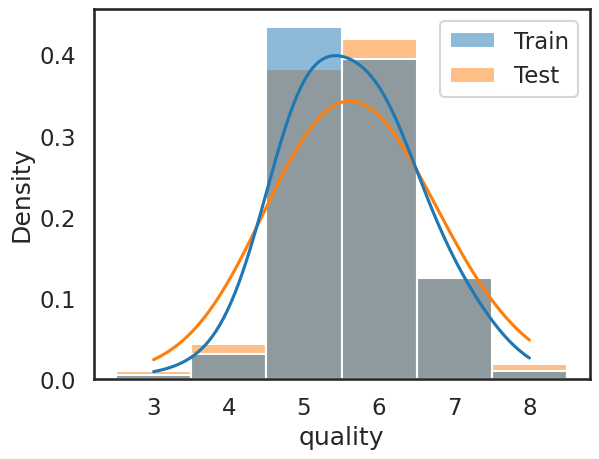

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("talk")

train = pd.DataFrame(y_train) # we have to convert y_train to a dataframe, as it is a pandas Series
train['set'] = 'Train' # label the data for plotting with seaborn

test = pd.DataFrame(y_test)
test['set'] = 'Test'

plot_df = pd.concat([train, test]) # concatenate the dataframes

g = sns.histplot(plot_df, 
             x='quality', 
             hue='set', 
             discrete=True, 
             stat='density', 
             common_norm=False,
             kde=True,
             kde_kws={'bw_adjust': 3}) # plot the histogram

g.get_legend().set_title('') # remove the title of the legend

## Step 4: Train a linear regression model

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # create a model
model.fit(X_train, y_train) # train the model

# Now we have a trained linear regression model!

# If we want to make predictions, we can use the predict() method
y_pred = model.predict(X_test)
print(y_pred[:20]) # print the quality prediction for first 20 wine samples in the testing set

[5.74526829 5.45889967 5.25476857 5.75783801 5.98858717 5.19065416
 5.68087184 6.03049576 6.38149714 5.35673434 5.62820455 5.45516081
 5.3311918  5.36963302 5.85193367 5.75310216 5.1529254  5.44727202
 5.76679216 6.2268174 ]


## Evaluating the performance of a regression model

We have trained our model and made some predictions. But how well did our model do? One of the most common metrics for regression tasks is the **mean squared error** (MSE). It calculates the average of the squares of the errors, that is, the average squared difference between **the estimated values** and the **true values**. The lower the MSE, the better our model is. MSE is calculated as follows:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2$$

where $y_{i}$ is the true value and $\hat{y}_{i}$ is the predicted value.

Another common metric is the **RMSE** (root mean squared error), which is simply the square root of the MSE. It is easier to interpret, as it is in the same units as the target variable. If, for example, our regression model is trained to predict length of a chemical bond in $Å$ (Angstrems), the root mean squared error will also be reported in $Å$, while the unit of MSE is $Å^2$. 

You will often find both metrics used in practice, with MSE used for training the model (such as in the case of linear regression you implemented last week) and RMSE used for reporting the model's performance.

$$RMSE = \sqrt{MSE}$$

MSE and RMSE metrics are implemented in the `sklearn` library.

In [8]:
# Let's see how well our model did
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse = round(mse, 3) # round the number to 3 decimal places
print('Mean squared error (MSE):', mse)

rmse = root_mean_squared_error(y_test, y_pred)
rmse = round(rmse, 3) # round the number to 3 decimal places
print('Root mean squared error (RMSE):', rmse)

Mean squared error (MSE): 0.476
Root mean squared error (RMSE): 0.69


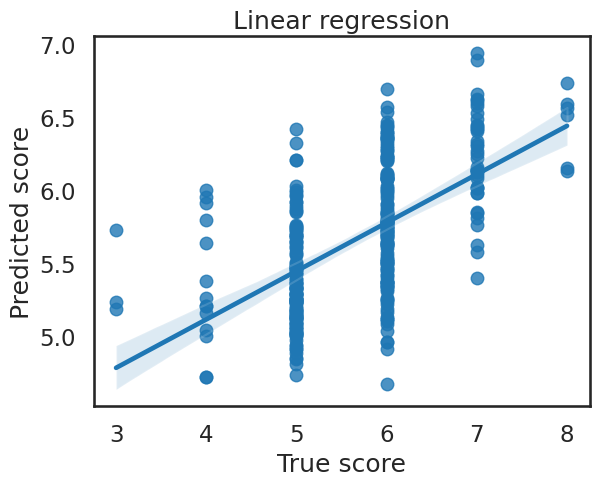

In [9]:
# Let's also plot the predictions against the true values

import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_test, y_pred, title='Linear regression'):
    sns.set_style("white")
    sns.set_context("talk")
    
    sns.regplot(x=y_test, y=y_pred)
    
    plt.title(title)
    plt.xlabel('True score')
    plt.ylabel('Predicted score')
    
plot_predictions(y_test, y_pred)

## Exercise 2: Try other regression models (1 point)

Although linear regression is one of the simplest regression models, it can fit the data really well, especially for feature spaces of multiple dimensions. However, there are many other regression models that we can try.

Try other regression models from the `sklearn` library and compare their performance to the linear regression model. The interface of all scikit-learn models is quite the same, including `.fit` and `.predict` methods we used earlier for fitting the model to data and making predictions about new data with our linear regression model. 

Some of the more frequently used regressors include **support vector machines** and **decision trees**. You can try the `SVR` (Support Vector Regression) and `RandomForestRegressor` for the task. You can refer to the official documentation for [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) and [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for more information.

1. Try the `SVR` and `RandomForestRegressor` models. Train them on the training set and evaluate their performance on the testing set using the mean squared error metric. Compare the results with the linear regression model. Which model performs the best?

In [10]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

SVM MSE: 0.622
SVM RMSE: 0.788


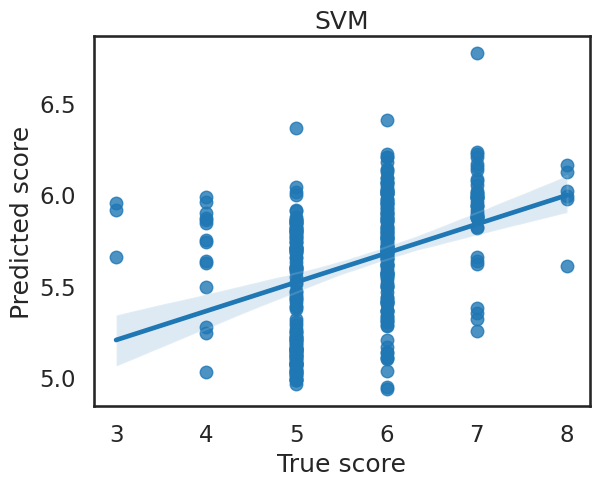

In [11]:
svr = SVR()

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print('SVM MSE:', round(mean_squared_error(y_test, y_pred), 3)) # the lower, the better

print('SVM RMSE:', round(root_mean_squared_error(y_test, y_pred), 3))

plot_predictions(y_test, y_pred, title='SVM')

Random Forest MSE: 0.383
Random Forest RMSE: 0.619


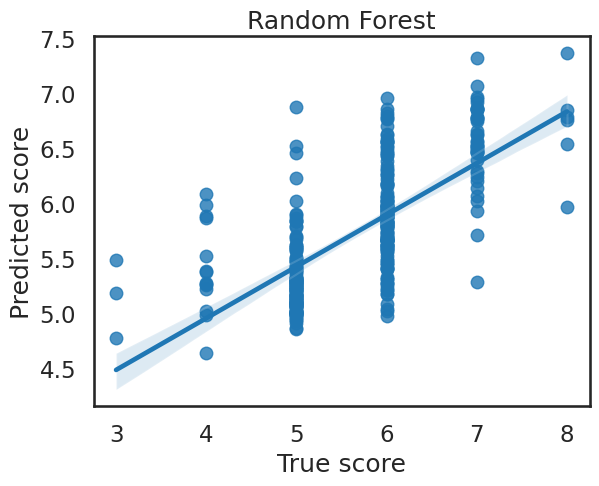

In [12]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest MSE:', round(mean_squared_error(y_test, y_pred), 3)) # the lower, the better

print('Random Forest RMSE:', round(root_mean_squared_error(y_test, y_pred), 3))

plot_predictions(y_test, y_pred, title='Random Forest')

## Preprocessing data

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn. If some features of our data have very different scales (for example, one feature is in the range [0, 1] and another can potentially be any positive number), **some models** might consider the feature with larger numerical values to be more important. This can be a problem, as we want our model to be able to learn from all features equally.

Standardization transform our data in such a way that its distribution will have a mean value $\mu = 0$ and standard deviation $\sigma = 1$. We can achieve this by using the `StandardScaler` from the `sklearn` library.

Another common preprocessing step is **normalization**. In this case, the data is scaled to a fixed range, usually $[0, 1]$. The motivation to use this scaling method includes preserving zeros in sparse data. For example, when making predictions about the expected outcome of an anticancer therapy, the value of $0$ observed tumors in a patient is probably much more informative for the predictive model than any other number of observed tumors alone. We can scale data to a certain range by using the `MinMaxScaler` from the `sklearn` library.

You can read more about those two feature scaling methods in the [Scikit-learn preprocessing docs](https://scikit-learn.org/stable/modules/preprocessing.html).

<center>
<img src="imgs/scaling.png" width="400">
</center>

In [13]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler() # you could also try MinMaxScaler if you think it would be more appropriate

scaler.fit(X_train) # fit the scaler to the training data

X_train_scaled = scaler.transform(X_train) # scale the training data
X_test_scaled = scaler.transform(X_test) # scale the testing data (using the same scaler, do not fit again!)

## Exercise 3: Train the models on the scaled data (1 point)

- Train the `LinearRegression`, `SVR`, and `RandomForestRegressor` models on the scaled training data and evaluate their performance on the scaled testing data. Compare the results (test RMSE) with the models trained on the unscaled data, and prepare a nice informative plot using seaborn.
 
*Which models benefit from data scaling and which do not? Based on your knowledge from the lectures, try to think why this might be the case.*

In [14]:
... 

Ellipsis

In [15]:
# Here is an example of how you could prepare a barplot comparing all trained models' performance using seaborn

unscaled = pd.DataFrame({
    'model': ['Linear regression', 'SVM', 'Random Forest'],
    'RMSE': [0.5, 0.6, 0.7] # example values, replace them with actual RMSE on test set
})
    
scaled = pd.DataFrame({
    'model': ['Linear regression', 'SVM', 'Random Forest'],
    'RMSE': [0.3, 0.4, 0.5] # example values, replace them with actual RMSE on test set
})

unscaled.head() # take a look at what you created
# scaled.head()

,model,RMSE
0,Linear regression,0.5
1,SVM,0.6
2,Random Forest,0.7


In [16]:
# If we want to plot the results in a single seaborn plot, we must concatenate (join) the dataframes, but we have to add a column which marks if the models were trained on scaled or unscaled data.

# You can name this new column whatever you want, we will just call it 'label'
unscaled['label'] = 'Unscaled'
scaled['label'] = 'Scaled'

plot_df = pd.concat([unscaled, scaled])

Text(0.5, 0, '')

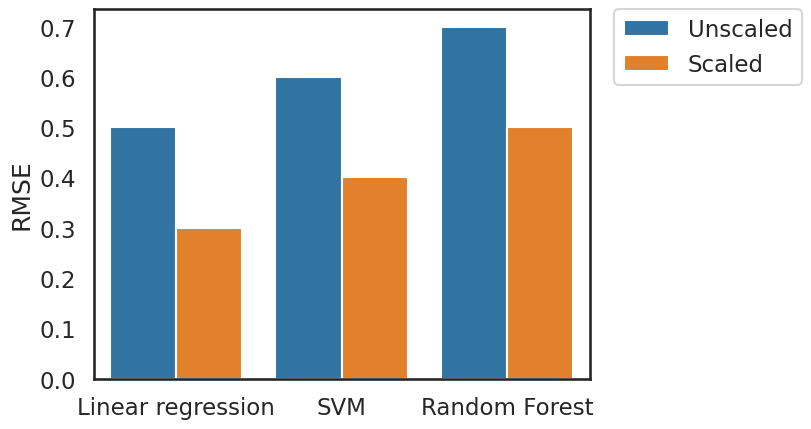

In [17]:
sns.set_style("white")
sns.set_context("talk")

barplot = sns.barplot(x='model', y='RMSE', hue='label', data=plot_df)

# remove the title of the legend just to make it look nicer
barplot.get_legend().set_title('')

# move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# hide x axis label
plt.xlabel('')

## Hyperparameter tuning

While the Random Forest did rather well, the out-of-the-box SVM had trouble correctly fitting to the data. This is often the case with SVMs, as they are very sensitive to their **hyperparameters**. Hyperparameters are parameters of a model that are not directly learned within estimators. Instead, they are to be set by us before fitting the model to data. In scikit-learn, hyperparameters are passed as arguments to the constructor of the estimator classes. We can try to tune the hyperparameters of the SVM to see if we can improve its performance.

For the list of available hyperparametes, check [scikit-learn SVM docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

In [18]:
 # We can list the current hyperparameters of the SVM model
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Validation set and hyperparameter tuning

When we are tuning the hyperparameters of our model, we should not use the testing set to measure the model's performance. If we did, we would find ourselves with a problem called **data leak** - a situation in which a model we constructed is biased to perform well on a particular test set, because we tuned its hyperparameters to perform well on this set (thus, the data 'leaks' from tho testing set to the model building process). 

To prevent it, we could first split the training set into two parts: the actual training set and the validation set. We will use the validation set to evaluate the model's performance during hyperparameter tuning. The testing set should be used only once, after we have tuned the hyperparameters and trained the model on the training set.

<center>
<img src="imgs/simple-validation.png" width="800">
</center>

Validation set SVM RMSE: 0.627


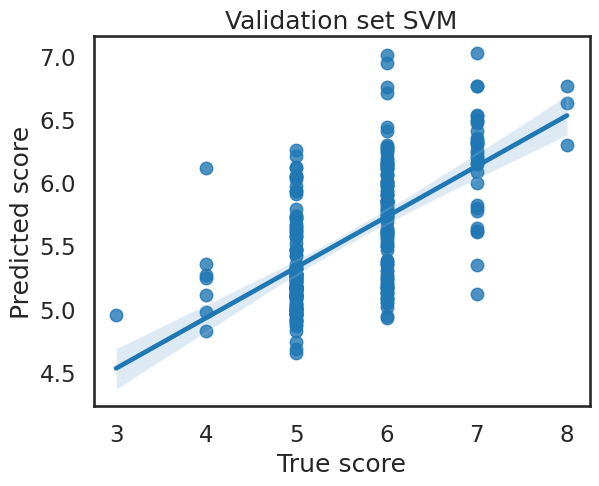

In [19]:
# We can use the train_test_split function to split the training set into the actual training set and the validation set

# First, we split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, we split the training set into the actual training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Let's try to tune the hyperparameters of the SVM model. We will focus on the 'C', 'gamma', and 'kernel' hyperparameters. You can modify them, re-run this code block, and see how the performance of our model changes (as measured by RMSE on the validation set).

svr = SVR(
    kernel='rbf',   # can be 'linear', 'poly', 'rbf', 'sigmoid'
    C=100,          # regularization parameter (float in range [0, inf])
    epsilon=0.1,    # epsilon in the epsilon-SVR model (float in range [0, inf])
    gamma='scale'   # kernel coefficient for 'rbf', 'poly', 'sigmoid' (float, 'scale', 'auto')
)

svr.fit(X_train, y_train) # train the model
y_pred = svr.predict(X_val) # make predictions on the validation set

print('Validation set SVM RMSE:', round(root_mean_squared_error(y_val, y_pred), 3)) # the lower, the better
plot_predictions(y_val, y_pred, title='Validation set SVM')

## Cross-validation and grid search

In practice, when tuning hyperparameters of a machine learning model, we do not usually create a single validation set. Instead, we employ a srategy called **cross-validation**. In $k$-fold cross-validation, the process of training and evaluating the model is repeated $k$ times, with each repetition using a different validation set. Thanks to this strategy, each data point present in the original training set will have the chance to be included in a validation sets. The metrics reported from $k$ folds are then averaged to get a more reliable estimate of the model's performance.

<center>
<img src="imgs/cross-validation.png" width="800">
</center>

You have probably noticed by now that tuning hyperparameters manually can be a tedious and time-consuming process. Luckily, scikit-learn provides a `GridSearchCV` class that can help us with this task. It performs an exhaustive search over a specified parameter grid and evaluates the model's performance using $k$-fold cross-validation. By default, `GridSearchCV` uses a 5-fold cross-validation, which is a common choice for $k$.

In [21]:
from sklearn.model_selection import GridSearchCV

# We will define a grid of hyperparameters as a dictionary. The keys are the hyperparameter names, and the values are lists of possible values to try.

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(
    svr, # the model
    param_grid, # the grid of hyperparameters
    verbose=2 # print the progress
)

svr = grid_search.fit(X_train, y_train) # GridSearchCV.fit() returns the best model, and we can save it to a new variable

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.00

KeyboardInterrupt: 

In [ ]:
# Report the best hyperparameters and RMSE on the testing set

print('Best hyperparameters:', svr.get_params())

y_pred = svr.predict(X_test)

print('Testing set SVM RMSE:', round(root_mean_squared_error(y_test, y_pred), 3))
plot_predictions(y_test, y_pred, title='Testing set SVM')

### Randomized search

`RandomizedSearchCV` is an alternative to `GridSearchCV`. Instead of trying all possible combinations of fixed hyperparameters, it samples a fixed number of hyperparameter settings from specified probability distributions. Although you may be hesitant to use it, as it is not an exhaustive search, it is often more efficient than Grid search. Randomized search is especially useful when we have many hyperparameters to tune, and we are not sure which ones are the most important. Take a look at the figure below and try to understand why this is the case.

<center>
<img src="imgs/grid-vs-random.png", width="800">
</center>


## Exercise 4: Hyperparameter tuning (1 point)

